# Setup

In [1]:
# data wrangling
import pandas as pd

# top2vec
from top2vec import Top2Vec

# data visualisation
import matplotlib.pyplot as plt

# Data Import

In [2]:
# import data
df = pd.read_excel("output/obama_speeches.xlsx", index_col = 0)
df

,speech,date
file_1,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2004-07-27
file_2,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-01-06
file_3,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-06-04
file_4,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-10-25
file_5,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2005-12-15
...,...,...
file_432,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-10
file_433,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-12
file_434,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-17
file_435,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...,2017-01-18


In [3]:
speeches_list = df['speech'].tolist()

# Top2Vec

In [4]:
# train top2vec model
model = Top2Vec(speeches_list)

2022-05-31 12:47:09,796 - top2vec - INFO - Pre-processing documents for training
2022-05-31 12:47:12,736 - top2vec - INFO - Creating joint document/word embedding
2022-05-31 12:48:18,914 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-31 12:48:25,143 - top2vec - INFO - Finding dense areas of documents
2022-05-31 12:48:25,153 - top2vec - INFO - Finding topics


In [5]:
# print the number of speeches most similar to each topic
topic_sizes = model.get_topic_sizes()
print(topic_sizes)

(array([152, 122, 111,  51]), array([0, 1, 2, 3]))


In [6]:
# get topic parameters
topic_words, word_scores, topic_nums = model.get_topics()

In [7]:
# print topics and associated keywords
for words, scores, topic in zip(topic_words, word_scores, topic_nums):
    print(f"topic: {topic}")
    print(f"keywords: {words}\n")

topic: 0
keywords: ['nations' 'world' 'human' 'peace' 'peoples' 'international' 'must'
 'governments' 'societies' 'countries' 'dignity' 'partners' 'peaceful'
 'syria' 'conflict' 'europe' 'freedom' 'united' 'region' 'isil' 'citizens'
 'arab' 'extremism' 'regime' 'diplomacy' 'conflicts' 'forces' 'global'
 'democracy' 'states' 'libyan' 'progress' 'civilians' 'development'
 'democracies' 'coalition' 'peacefully' 'libya' 'economies' 'tolerance'
 'advance' 'globe' 'terrorists' 'syrian' 'terrorist' 'universal'
 'extremists' 'humanitarian' 'aspirations' 'war']

topic: 1
keywords: ['tax' 'deficit' 'economy' 'money' 'cuts' 'insurance' 'savings' 'medicare'
 'spending' 'pay' 'recovery' 'businesses' 'republicans' 'health' 'afford'
 'debt' 'plan' 'jobs' 'budget' 'deficits' 'trillion' 'cost' 'premiums'
 'care' 'wealthiest' 'reform' 'seniors' 'affordable' 'recession'
 'medicaid' 'waste' 'dollars' 'balanced' 'bills' 'costs' 'banks' 'loans'
 'companies' 'coverage' 'democrats' 'financial' 'taxpayers' 'in

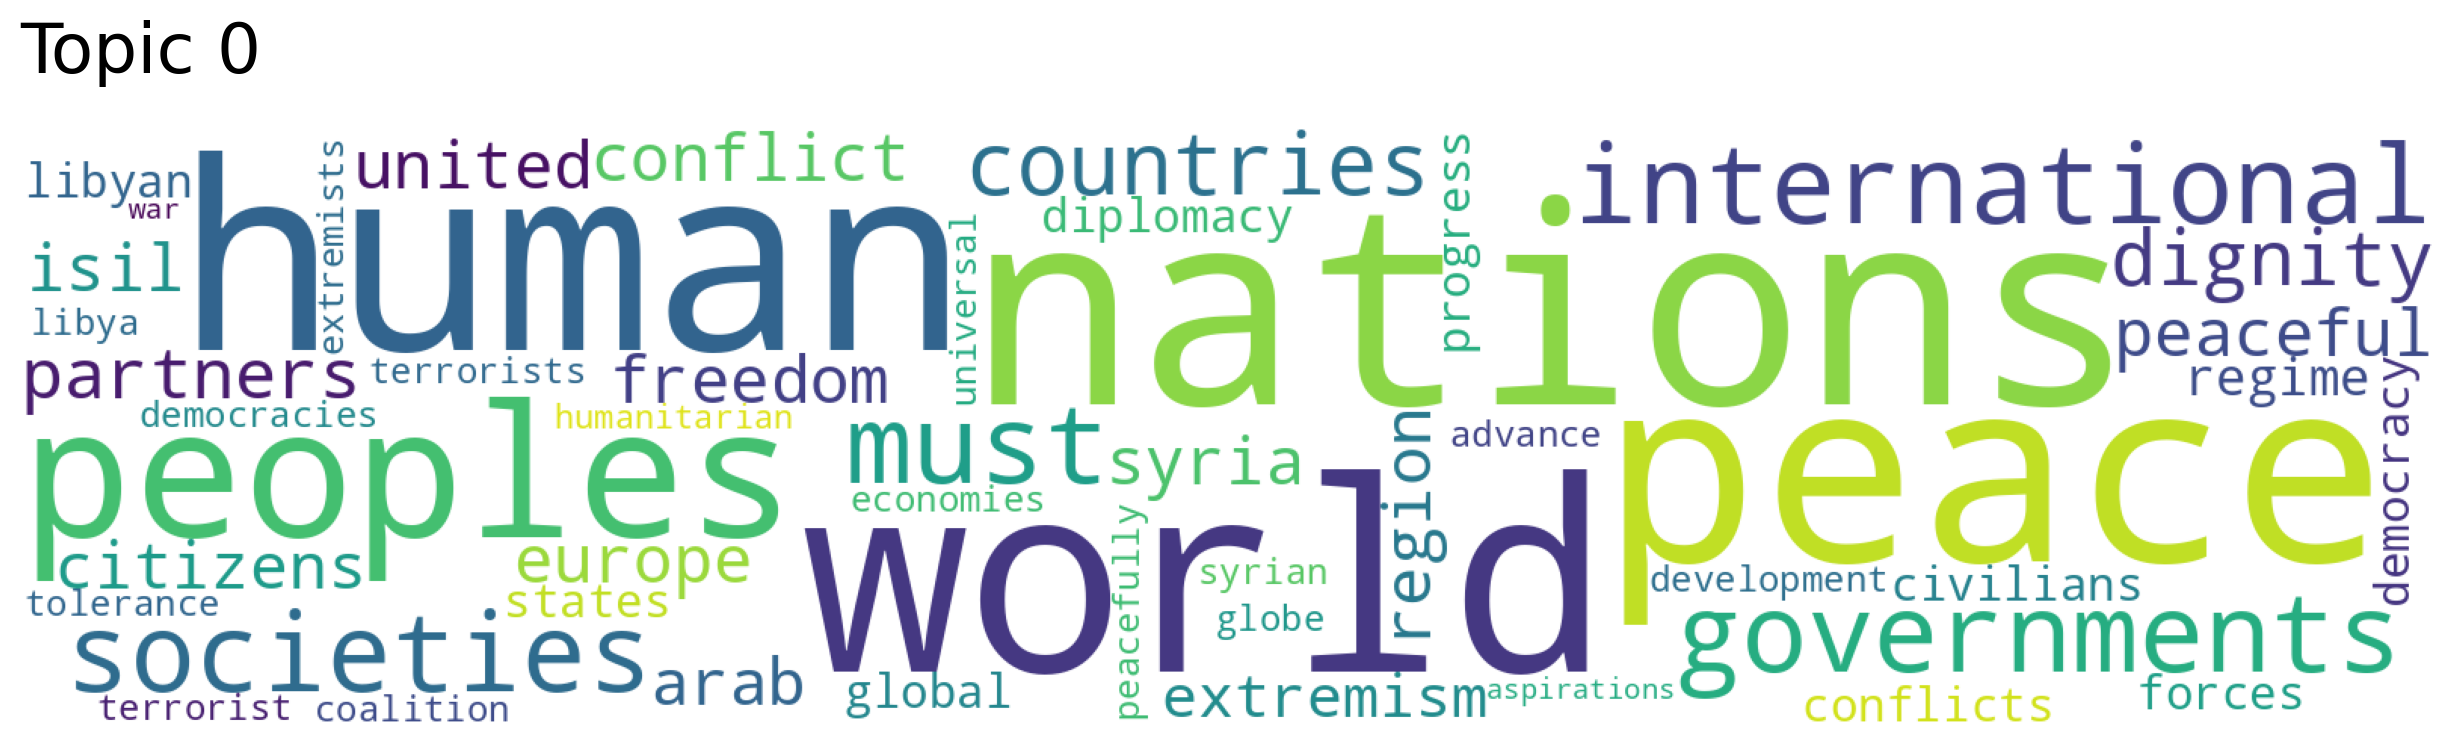

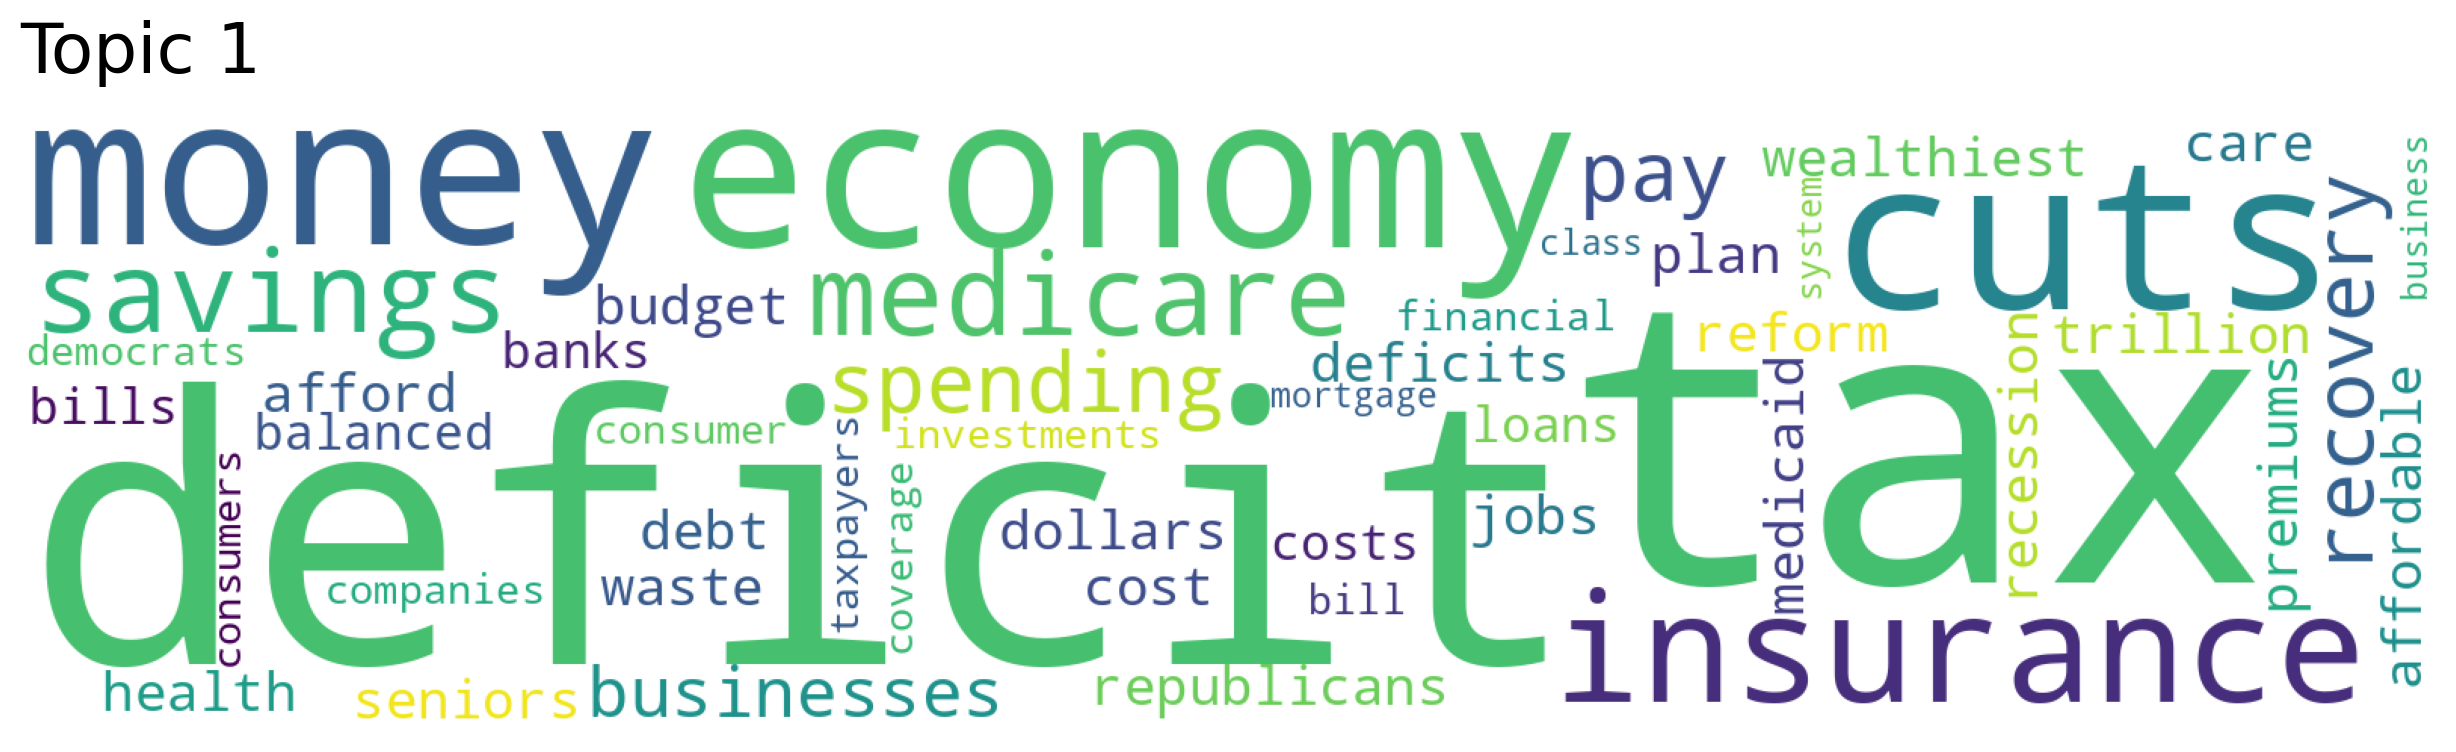

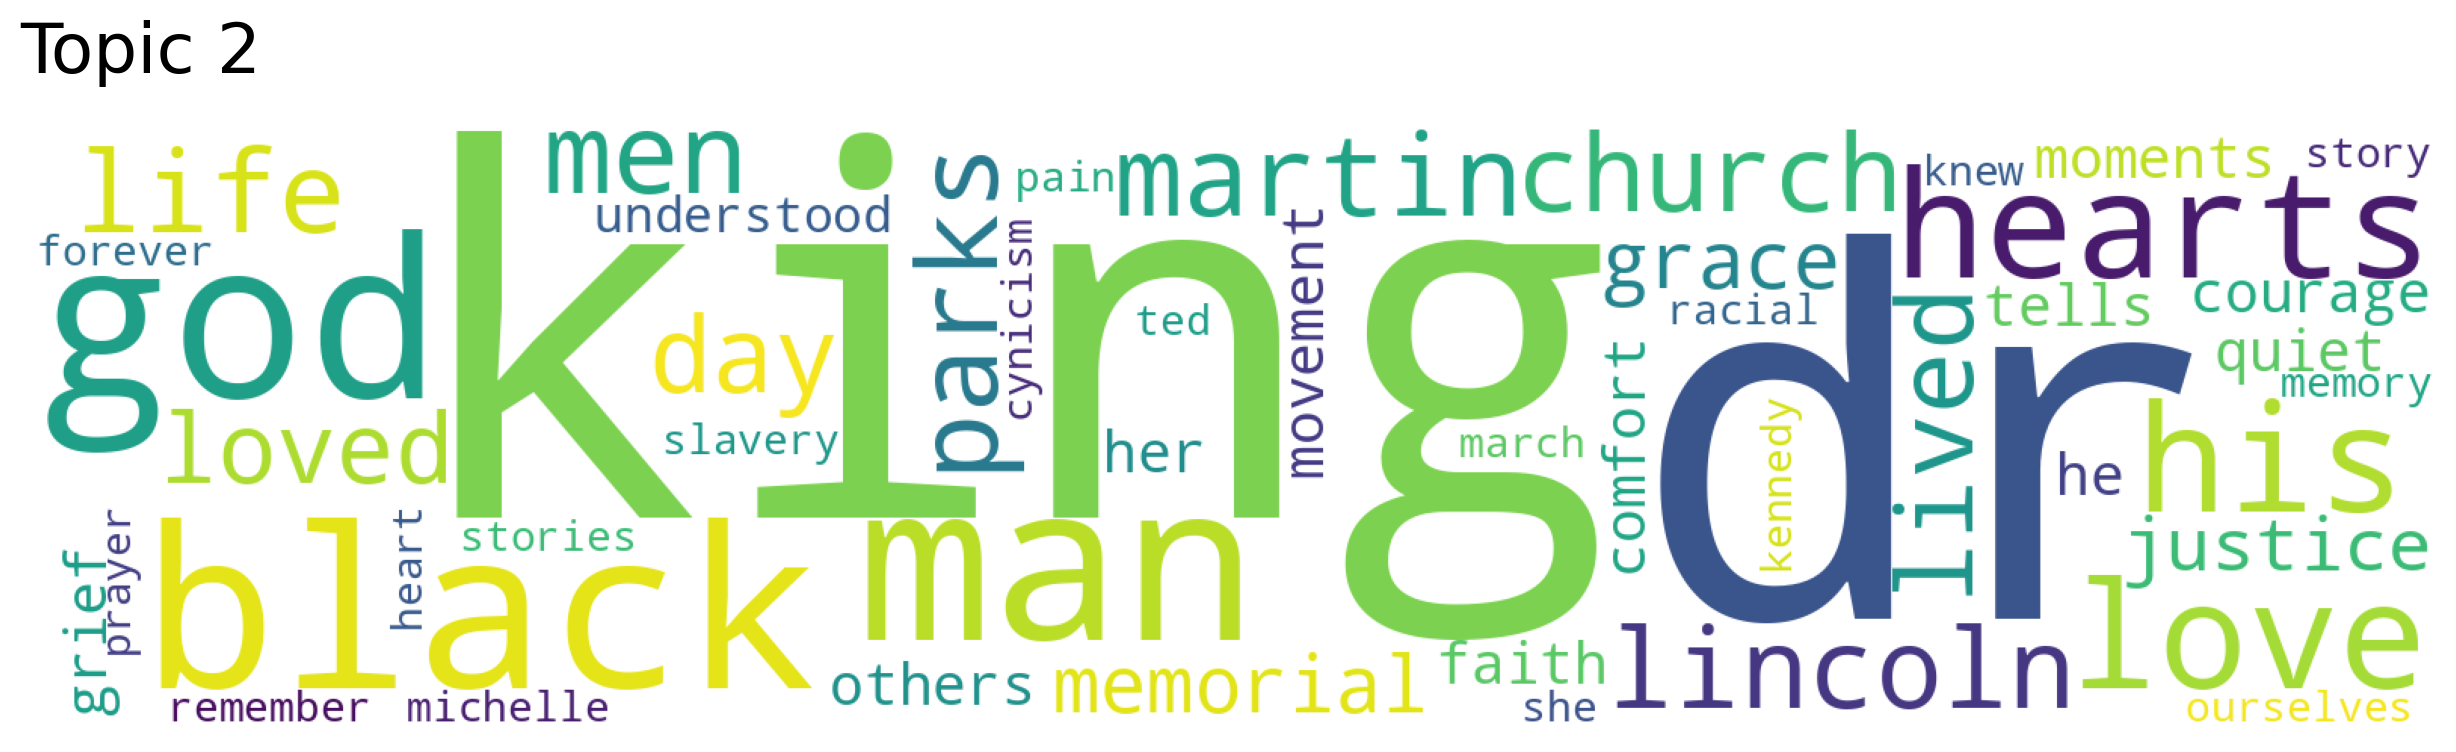

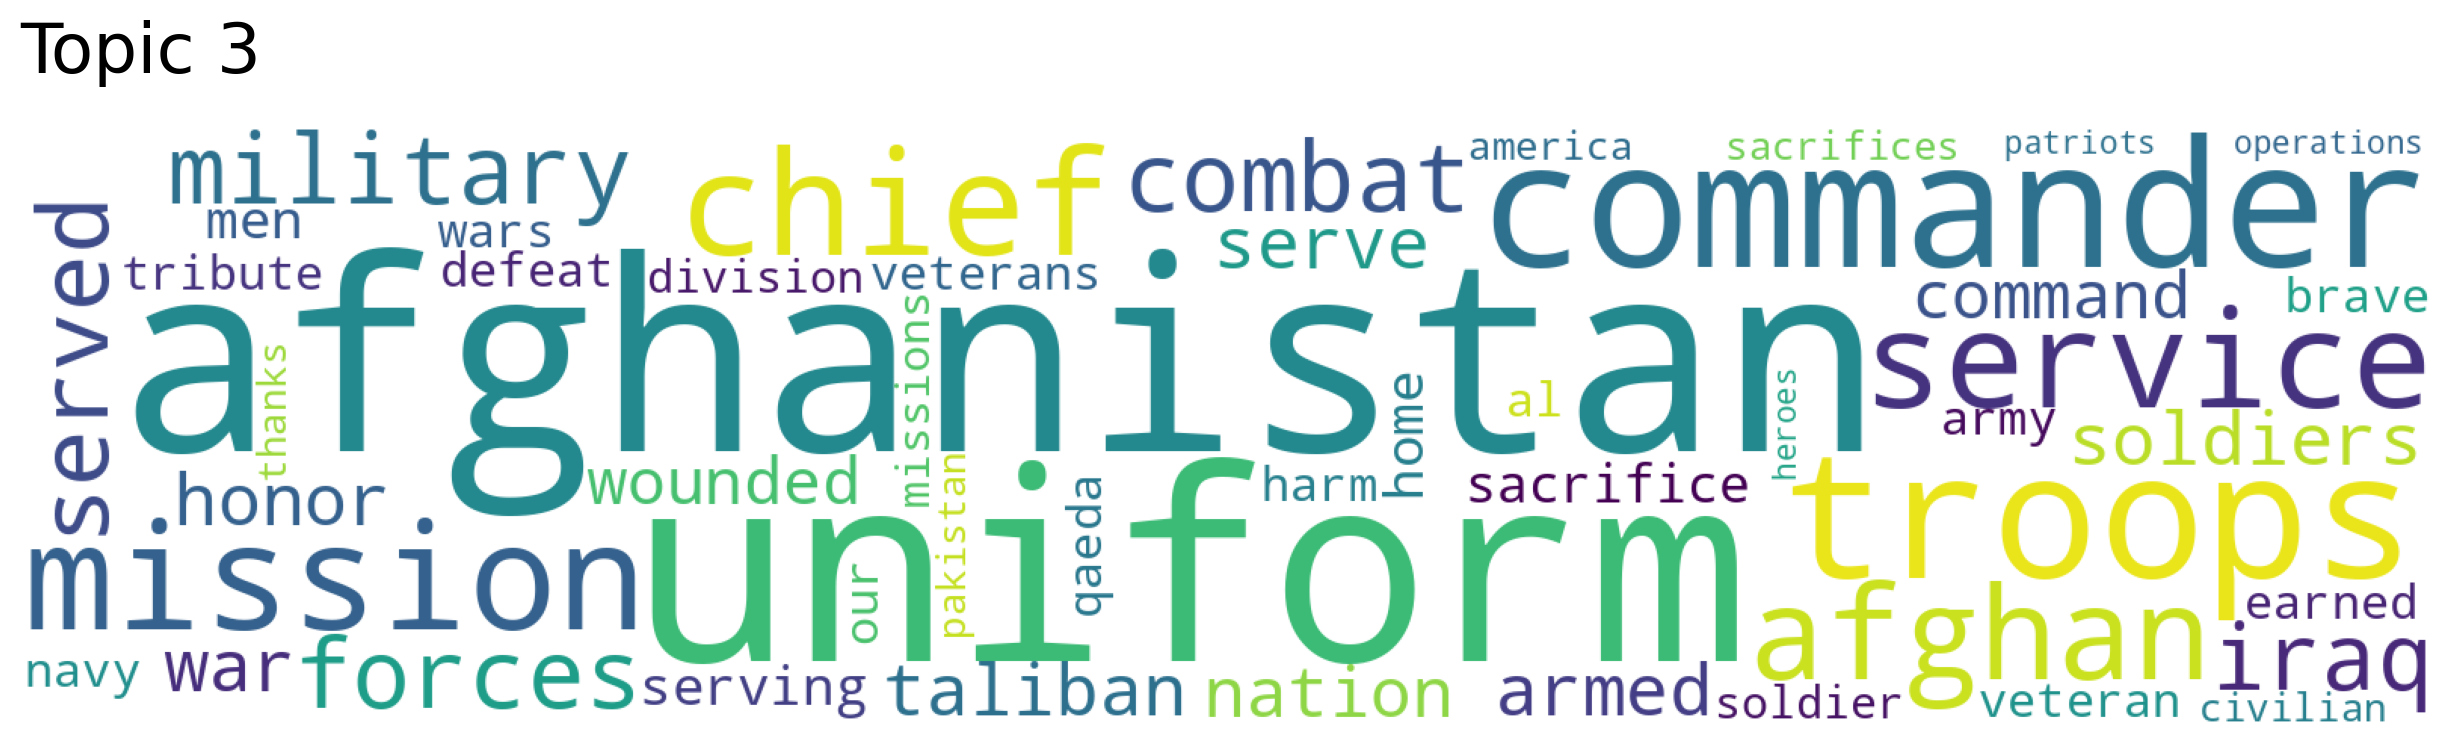

In [8]:
# generate word clouds
i = 0
for topic in topic_nums:
    model.generate_topic_wordcloud(topic, background_color = "white")
    plt.show()
    print("\n")
    i = i + 1